In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

### Helper functions

In [2]:

#resetting cards
def reset_deck(n):
    ind_card_set = [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.,10.,10.,10.]
    new_deck = ind_card_set*4*n
    return new_deck

#function to pick card from a deck
def draw(deck):
    pick = random.choice(deck)
    deck.remove(pick)
    return pick,deck

#defines the single round of a player when the player chose to draw a card
def single_round(player,deck):
    pick,deck = draw(deck)
    player.append(pick)
    return player, deck
#Check for ace and change the value 1 to 11 and viceversa according to condition
def ace_check(player):
    if (1 in player):
        if (sum(player)+10 <= 21):
            for i in range(len(player)):
                if (player[i] == 1):
                    player[i] = 11
                    break
    conv_player = player            
    if (11 in player):
        if (sum(player) > 21):
            for i in range(len(player)):
                if (player[i] == 11):
                    player[i] = 1
                    break 
    conv_player = player                
    return conv_player
#counting probablitiy of remaining cards in deck
def prob(player,deck):   
    high = 0
    low = 0
    for i in range(1,int(22 - sum(player))):
        high+= deck.count(i)
    high /= len(deck)    
    for i in range(int(22 - sum(player)),21):
        low+= deck.count(i)
    low /= len(deck)  
    return high,low

### Environment

In [3]:
def initialize(deck):   
    dealer =[]                 #clearing dealer hand
    player =[]                 #clearing player hand
    
    d_card,deck = draw(deck) 
    dealer.append(d_card)      #providing dealer with one card
    
    p_card,deck = draw(deck)
    player.append(p_card)      #providing dealer with one card
    
   # p_card,deck = draw(deck)
   # player.append(p_card)      #providing dealer with one card
    
    game_over= False           #The results will be evaluated when it becomes true
    reward = 0
    state = int((((dealer[0])-1)*21)+sum(player)) #Position of current state in Q- table
    return state,player,dealer,deck

def one_step(player,dealer,deck,action,game_over,card_counting): 
    r = 1
    if (action and sum(player)<21):                          #if action is 1 pick a card
        player,deck = single_round(player,deck)
        player = ace_check(player)                           #check for ace
    if(card_counting):    
        high,low = prob(player,deck)                         #check for the probablity of next card
        
        if(low<=high):
            h = 0                                            #high chances of busting
            
        if(low>high):
            h = 1                                            #low chances of busting
        state = int((((dealer[0])-1)*21)+sum(player))*2 + int(h) #updating state from 31 x10 table to Q table(310)
    else: 
        state = int((((dealer[0])-1)*21)+sum(player))
    if (action == 0 and game_over == False or sum(player)>21):# Evaluating if the game is over
        r = evaluate(dealer,player,deck)
        game_over = True        
    return state,r, game_over,player,dealer

### Evaluation 

In [4]:
def evaluate(dealer,player,deck):
    #dealer round
    while sum(dealer)<dealer_threshold:
        dealer,deck = single_round(dealer,deck)# Drawing card for dealer till sum of dealer reaches dealer threshold
  
    dealers = sum(dealer)
    players = sum(player)
#decision making    
    if(dealers > 21 and players > 21 ):
        #print("Both busted")
        reward = 0
        
    elif(dealers > 21 and players <= 21 ):
        #print("Player won and dealer busted")
        reward = 1
        
    elif(dealers <= 21 and players > 21 ):
        #print("Dealer Won and player busted")
        reward = -1
        
    elif(dealers > players):
        #print("Dealer won")
        reward = -1
        
    elif(dealers < players):
        #print("Player won")
        reward =  1
        
    elif(dealers == players):
        #print("Draw match")
        reward = 0    
    return reward  

### Plot functions 

In [5]:
def plot_func(win,game):    
    wins = []
    loses =[]
    split = int(game/50) #calculating winning percentage for every 50 games
    start = 0
    end = split
    x1 =[]
    for i in range(int(len(win)/split)):
        c = win[start:end]
        wins.append((c.count(1)/len(c))*100)
        loses.append((c.count(0)/len(c))*100)
        x1.append(start)
        start+=split
        end+=split
    plt.plot(x1,wins)
    plt.title('Win rate')
    plt.xlabel("Number of Games")
    plt.ylabel("Win Percentage")
    plt.show()
    #plt.plot(x1,loses)
    #plt.title('Lose rate')
    #plt.xlabel("Number of Games")
    #plt.ylabel("Lose Percentage")
    #plt.show()
    plt.plot(ep)
    plt.title('Epsilon decay')
    plt.xlabel("Number of Games")
    plt.ylabel("Epsilon")
    plt.show()
def strategy_func(q_table,card_counting):
    if(card_counting):
        plt.text(0.04,0.6,"Policy garph is not available as the action at each time step ",fontsize=10, color="red")
        plt.text(0.15,0.5,"differs with number of cards remaining in deck ",fontsize=10, color="red")
        
        plt.show()
    else:    
        des =[]
        for i in q_table:
            des.append(np.argmax(i))
        des = np.array(des[:210]).reshape(10,21)[:21] #Reshaping first 210 rows of Q table into 10x 21 decision table
        entry = np.zeros((10,2))
        for i in range(10):
            entry[i][0] = (i+1)
            entry[i][1] = (np.bincount(des[i])[1])
        plt.step(entry.T[0], entry.T[1])
        plt.yticks(range(1,22,2))
        plt.xticks(range(1,10))
        plt.title('Strategy')
        plt.xlabel('Dealer card')
        plt.ylabel('player card total')
        plt.text(5,(entry.T[1][5]-4),'Hit',fontsize=15, color="green")
        plt.text(5,(21-1.5),'Stick',fontsize=15, color="red")
        plt.show()
def decision_tab(q_table):
    des =[]
    for i in q_table:
        des.append(np.argmax(i))
    des = np.array(des[:210]).reshape(10,21)[:21] #Reshaping first 210 rows of Q table into 10x 21 decision table
    print("Decision Table")
    print(des.T)        

### Hyper Parameters

In [6]:
dealer_threshold = 17          #dealer's sum limit at which the dealer should stop drawing card
Total_deck = 8                 #total number of deck used
games = 1000000                #Number of games
alpha = 0.1                    #learning rate
row = 0.1                      #discount rate
epsilon =1                     #initial epsilon
epsilon_limit = [1,0.01]       #upper and lower limit of epsilon

#Result Visualization
plot = True                    #plot winning rate and epsilon decay
print_status = True            #print the final report of games played
policy = True                  #plot strategy garph and table
decision_table = True          #Live update of Q-table
card_counting = False          #Card counting strategy

### Markov Decision Process (MDP)

Dealer's Threshold: 17
card counting: False
Played 1000000 games and won 40 % of it
explored: 8 %
exploited: 92 %


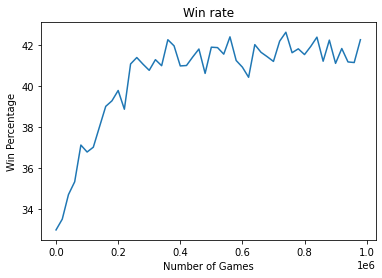

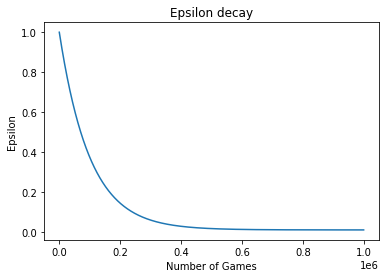

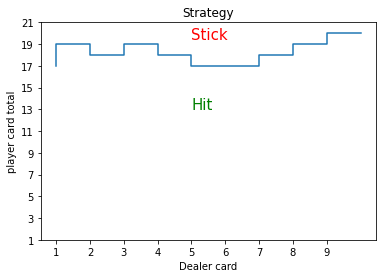

Decision Table
[[0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 0 1 1 1]
 [0 1 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]]


In [7]:
epsilon_decay_rate = (1/(games/10))# 0.00001    #rate of epsilon decay
max_step_per_game = 11         #Maximum possible steps in a round (Player: [1,1,1,1,2,2,2,2,3,3,3])
q_table = np.zeros((310,2))    # sum of player(21) * dealer faceup card possiblities(10) + busted state (10) [(21*10)+10 , 2 actions]    
if(card_counting):
    q_table = np.zeros((620,2))
min_card = 15                  #minimum card required for 1 game
win = []                       #List to store final rewards
ep = []                        #list to store epsilon at each step
exp =[]                        #list to store exploration and exploitation data
deck = reset_deck(Total_deck)  #Resetting deck
h1=[]
for t in range(games):         # loop for each game    
    if (len(deck)<min_card):   # reshuffle card when deck count goes below min_card
        deck = reset_deck(Total_deck)
    state,player,dealer,deck = initialize(deck) #clear dealer and player hand
    game_over = False
    
    for Round in range(max_step_per_game):         #loops over eack round in 1 game
        
        epsilon_threshold = np.random.uniform(0,1) #random value to decide exploit or explore
        if(epsilon_threshold>epsilon):
            action = np.argmax(q_table[state,:])   #exploit
            exp.append(0) 
        else:
            action = np.random.choice([0,1])       #explore
            exp.append(1)
        
        #playing one round 
        new_state,reward,game_over,player,dealer = one_step(player,dealer,deck,action,game_over,card_counting)#implementing action on the environment
        
        # updating Q table values using bellman equation 
        q_table[state , action] = q_table[state,action]* (1-alpha) + alpha * (reward + row*np.max(q_table[new_state,:]))
        state = new_state
        if (game_over == True):#check for game terminaton
            break
            
            
    #epsilon decay after each game        
    epsilon = epsilon_limit[1]+(epsilon_limit[0] - epsilon_limit[1])* np.exp(-epsilon_decay_rate*t) 
    if (t%(games/1000) == 0):
        clear_output(wait=True)
        print("Playing",games,"games : ",int(((t+(games/50))/games)*100), '%')
        if (decision_table and card_counting == False):decision_tab(q_table)
    ep.append(epsilon)
    win.append(reward)
    
#printing status    
if (print_status):    
    clear_output(wait=True)
    print ("Dealer's Threshold:",dealer_threshold )
    print("card counting:",card_counting)
    print("Played", games, "games and won", int((win.count(1)/len(win))*100),'%', "of it")
    print("explored:",round((exp.count(1)/len(exp))*100),'%')
    print("exploited:",round((exp.count(0)/len(exp))*100),'%')

# plotting win rate and epsilon decay    
if(plot):
    plot_func(win,games)               

#Plotting policy    
if(policy and plot):
    strategy_func(q_table,card_counting)
    if (card_counting == False):decision_tab(q_table)